# Deep Learning with MNIST

## Loading Dependencies

In [1]:
import numpy as np
import pandas as pd
import sklearn as sk
import tensorflow as tf
import matplotlib.pyplot as plt

## Importing Data

In [2]:
raw_train = pd.read_csv('mnist_data/train.csv')
test_X = pd.read_csv('mnist_data/test.csv')

In [3]:
print("Rows in training set:", raw_train.shape[0])
display(raw_train.head())
print("Rows in test set:", test_X.shape[1])
display(test_X.head())

Rows in training set: 42000


,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Rows in test set: 784


,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
raw_train.groupby('label')[['label']].count()

,label
label,
0,4132
1,4684
2,4177
3,4351
4,4072
5,3795
6,4137
7,4401
8,4063


## Generating a Train-Validation Split for the Dataset

In [5]:
# Here, we first randomly shuffle the data, then use an 80 (training set size) - 20 (test set size) split to create two
# distinct datasets
shuffled = raw_train.sample(frac=1)

split_index = int(.8 * len(shuffled))

# Training set will constitute 80% of the original raw training data
train = raw_train.iloc[:split_index]

# Validation set will constitute the other 20% of the raw training data
val = raw_train.iloc[split_index:]

# Finally, separate the label column from the features for convenience during model training
train_X, train_y = train.iloc[:, train.columns != 'label'].reset_index(drop=True), train['label'].reset_index(drop=True)
val_X, val_y = val.iloc[:, val.columns != 'label'].reset_index(drop=True), val['label'].reset_index(drop=True)

In [6]:
display(train_X.head())
display(train_y.head())
display(val_X.head())
display(val_y.head())

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


0    1
1    0
2    1
3    4
4    0
Name: label, dtype: int64

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


0    0
1    7
2    7
3    2
4    2
Name: label, dtype: int64

## Visualizing the Dataset

Since each row represents a 28 x 28 image flattened into a 1-D array where each pixel value represents the shade of the color of that pixel, we can use functions available in the **matplotlib** package to actually visualize each row as images. Here are a few examples below:

In [7]:
def plot_image(row, shape=(28, 28)):
    array_row = np.array(row)
    reshaped = array_row.reshape(shape)
    plt.imshow(reshaped, cmap="gray")
    plt.show();

Showing image 0 with truth label: 1


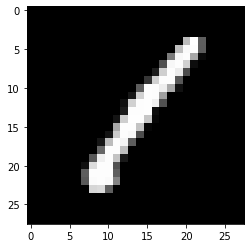

Showing image 1 with truth label: 0


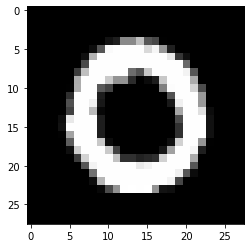

Showing image 2 with truth label: 1


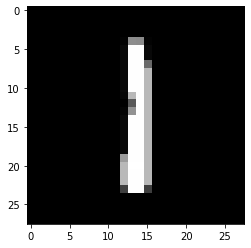

Showing image 3 with truth label: 4


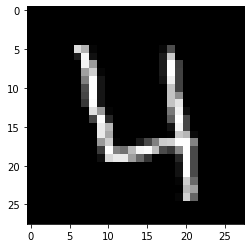

Showing image 4 with truth label: 0


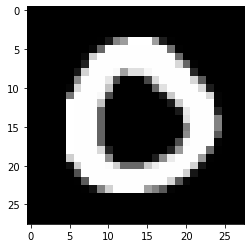

In [8]:
for i in range(5):
    print("Showing image", i, "with truth label:", train_y.iloc[i])
    row = train_X.iloc[i]
    # Reshape the row into a 28 x 28 matrix
    plot_image(row)

## Normalization

In [51]:
# Since all values range from 0 to 255, try normalizing by dividng every row by 255, the maximum possible number.
train_norm_X = train_X / 255
val_norm_X = val_X / 255

## Supervised Learning

In [52]:
def calculate_accuracy(predictions, actual):
    return np.sum(predictions == actual) / len(actual)

### Benchmark Classifier for Comparison: Random Forest

In [63]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(criterion='entropy', min_samples_split=10)

In [64]:
rf.fit(train_norm_X, train_y)

RandomForestClassifier(criterion='entropy', min_samples_split=10)

In [65]:
rf_train_predictions = rf.predict(train_norm_X)
rf_val_predictions = rf.predict(val_norm_X)

In [66]:
rf_val_predictions

array([0, 7, 7, ..., 7, 6, 9])

In [86]:
# Training Accuracy
calculate_accuracy(rf_train_predictions, train_y)

0.9974107142857143

In [67]:
# Validation Accuracy
calculate_accuracy(rf_val_predictions, val_y)

0.9622619047619048

**Validation Accuracy: 96.3%**

#### Misclassification Analysis

In [68]:
rf_mistakes_X = val_X[rf_val_predictions != val_y]
rf_mistakes_y = val_y[rf_val_predictions != val_y]
rf_mistakes_predictions = rf_val_predictions[rf_val_predictions != val_y]

Truth label: 5
Predicted label: 3


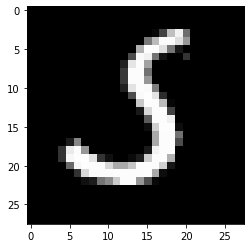

Truth label: 0
Predicted label: 6


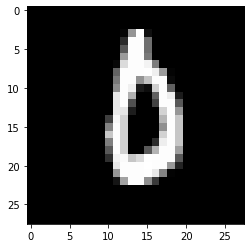

Truth label: 3
Predicted label: 7


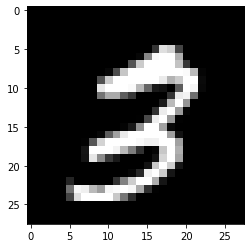

Truth label: 3
Predicted label: 7


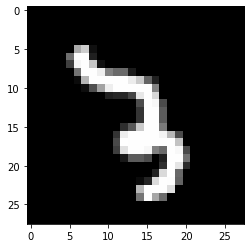

Truth label: 3
Predicted label: 2


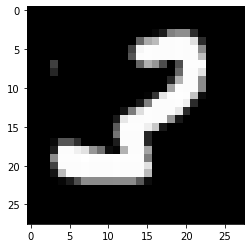

Truth label: 3
Predicted label: 5


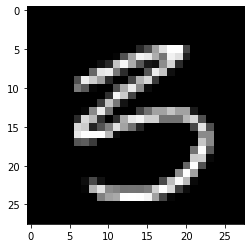

Truth label: 7
Predicted label: 9


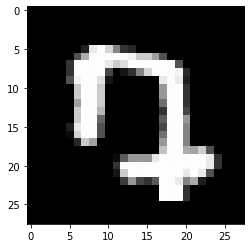

Truth label: 7
Predicted label: 2


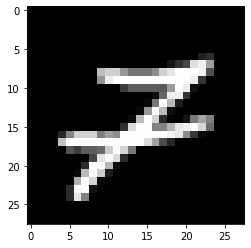

Truth label: 3
Predicted label: 7


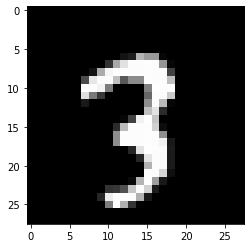

Truth label: 5
Predicted label: 6


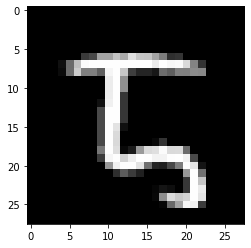

In [69]:
# Plot some images and compare them to predicted results
for i in range(10):
    print("Truth label:", rf_mistakes_y.iloc[i])
    print("Predicted label:", rf_mistakes_predictions[i])
    row = rf_mistakes_X.iloc[i]
    # Reshape the row into a 28 x 28 matrix
    plot_image(row)

In [70]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten

### Deep Learning Classifier: Feed-Forward Neural Network

In [71]:
# Neural Network Initialization

ff_model = Sequential([
    Dense(1024, input_dim=train_X.shape[1], activation='relu'),
    Dense(10, activation='softmax')
])

In [72]:
# Compiling the Network

ff_model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [73]:
# Fitting and Evaluating the Network

ff_model.fit(train_norm_X, train_y, epochs=200, batch_size=20)

Epoch 1/200
1680/1680 [==============================] - 8s 5ms/step - loss: 0.3704 - accuracy: 0.8865
Epoch 2/200
1680/1680 [==============================] - 7s 4ms/step - loss: 0.0892 - accuracy: 0.9718
Epoch 3/200
1680/1680 [==============================] - 7s 4ms/step - loss: 0.0527 - accuracy: 0.9843
Epoch 4/200
1680/1680 [==============================] - 7s 4ms/step - loss: 0.0325 - accuracy: 0.9900
Epoch 5/200
1680/1680 [==============================] - 7s 4ms/step - loss: 0.0237 - accuracy: 0.9918
Epoch 6/200
1680/1680 [==============================] - 7s 4ms/step - loss: 0.0210 - accuracy: 0.9931
Epoch 7/200
1680/1680 [==============================] - 7s 4ms/step - loss: 0.0164 - accuracy: 0.9945
Epoch 8/200
1680/1680 [==============================] - 7s 4ms/step - loss: 0.0135 - accuracy: 0.9957
Epoch 9/200
1680/1680 [==============================] - 7s 4ms/step - loss: 0.0159 - accuracy: 0.9942
Epoch 10/200
1680/1680 [==============================] - 7s 4ms/step - l

1680/1680 [==============================] - 8s 5ms/step - loss: 0.0020 - accuracy: 0.9996
Epoch 80/200
1680/1680 [==============================] - 8s 5ms/step - loss: 0.0073 - accuracy: 0.9988
Epoch 81/200
1680/1680 [==============================] - 8s 5ms/step - loss: 0.0051 - accuracy: 0.9990
Epoch 82/200
1680/1680 [==============================] - 9s 5ms/step - loss: 0.0054 - accuracy: 0.9993
Epoch 83/200
1680/1680 [==============================] - 9s 5ms/step - loss: 0.0023 - accuracy: 0.9995
Epoch 84/200
1680/1680 [==============================] - 9s 6ms/step - loss: 0.0012 - accuracy: 0.9998
Epoch 85/200
1680/1680 [==============================] - 9s 6ms/step - loss: 0.0104 - accuracy: 0.9985
Epoch 86/200
1680/1680 [==============================] - 10s 6ms/step - loss: 0.0021 - accuracy: 0.9996
Epoch 87/200
1680/1680 [==============================] - 10s 6ms/step - loss: 0.0056 - accuracy: 0.9996
Epoch 88/200
1680/1680 [==============================] - 9s 6ms/step - los

1680/1680 [==============================] - 11s 6ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 155/200
1680/1680 [==============================] - 11s 6ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 156/200
1680/1680 [==============================] - 11s 6ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 157/200
1680/1680 [==============================] - 11s 6ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 158/200
1680/1680 [==============================] - 10s 6ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 159/200
1680/1680 [==============================] - 10s 6ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 160/200
1680/1680 [==============================] - 10s 6ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 161/200
1680/1680 [==============================] - 10s 6ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 162/200
1680/1680 [==============================] - 10s 6ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 163/200
1680/1680 

In [74]:
accuracy = ff_model.evaluate(val_norm_X, val_y)[1]
print("Feed Forward Model Accuracy:", accuracy)

263/263 [==============================] - 1s 1ms/step - loss: 0.3997 - accuracy: 0.9815
Feed Forward Model Accuracy: 0.9815475940704346


**Validation Accuracy: 98.2%**

### Deep Learning Classifier: Convolutional Neural Network

In [76]:
# Building the CNN

image_dim = int(np.sqrt(train_X.shape[1]))

cnn_model = Sequential([
    # First convolutional layer
    Conv2D(32, kernel_size=3, activation='relu', input_shape=(image_dim, image_dim, 1)),
    MaxPooling2D(pool_size=2, strides=2),
    
    # Second convolutional layer
    Conv2D(64, kernel_size=3, activation='relu'),
    MaxPooling2D(pool_size=2, strides=2),
    
    # Fully Connected Classifier
    Flatten(),
    Dense(1024, activation='relu'),
    Dense(10, activation='softmax')
])

In [77]:
# Compiling the Network

cnn_model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [78]:
cnn_model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_6 (Flatten)          (None, 1600)              0         
_________________________________________________________________
dense_14 (Dense)             (None, 1024)              1639424   
_________________________________________________________________
dense_15 (Dense)             (None, 10)               

In [79]:
train_X_cnn = np.array(train_norm_X).reshape(len(train_norm_X), image_dim, image_dim, 1)
train_y_cnn = np.array(train_y)
val_X_cnn = np.array(val_norm_X).reshape(len(val_norm_X), image_dim, image_dim, 1)
val_y_cnn = np.array(val_y)

In [80]:
# Fitting the Network

cnn_model.fit(train_X_cnn, train_y_cnn, epochs=100, batch_size=20)

Epoch 1/100
1680/1680 [==============================] - 38s 22ms/step - loss: 0.2805 - accuracy: 0.9104
Epoch 2/100
1680/1680 [==============================] - 42s 25ms/step - loss: 0.0449 - accuracy: 0.9857
Epoch 3/100
1680/1680 [==============================] - 46s 27ms/step - loss: 0.0262 - accuracy: 0.9916
Epoch 4/100
1680/1680 [==============================] - 47s 28ms/step - loss: 0.0173 - accuracy: 0.9945
Epoch 5/100
1680/1680 [==============================] - 47s 28ms/step - loss: 0.0137 - accuracy: 0.9961
Epoch 6/100
1680/1680 [==============================] - 45s 27ms/step - loss: 0.0106 - accuracy: 0.9964
Epoch 7/100
1680/1680 [==============================] - 45s 26ms/step - loss: 0.0076 - accuracy: 0.9979
Epoch 8/100
1680/1680 [==============================] - 45s 27ms/step - loss: 0.0083 - accuracy: 0.9973
Epoch 9/100
1680/1680 [==============================] - 45s 27ms/step - loss: 0.0082 - accuracy: 0.9976
Epoch 10/100
1680/1680 [==============================]

1680/1680 [==============================] - 33s 20ms/step - loss: 4.3429e-10 - accuracy: 1.0000
Epoch 78/100
1680/1680 [==============================] - 33s 20ms/step - loss: 1.9674e-10 - accuracy: 1.0000
Epoch 79/100
1680/1680 [==============================] - 34s 20ms/step - loss: 1.7917e-10 - accuracy: 1.0000
Epoch 80/100
1680/1680 [==============================] - 34s 20ms/step - loss: 1.3947e-10 - accuracy: 1.0000
Epoch 81/100
1680/1680 [==============================] - 33s 20ms/step - loss: 6.9980e-11 - accuracy: 1.0000
Epoch 82/100
1680/1680 [==============================] - 33s 20ms/step - loss: 9.1585e-12 - accuracy: 1.0000
Epoch 83/100
1680/1680 [==============================] - 33s 20ms/step - loss: 4.2763e-12 - accuracy: 1.0000
Epoch 84/100
1680/1680 [==============================] - 34s 20ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 85/100
1680/1680 [==============================] - 34s 20ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 86/100
1680/1680 

In [84]:
cnn_accuracy = cnn_model.evaluate(val_X_cnn, val_y_cnn)[1]
print("CNN Model Accuracy:", cnn_accuracy)

263/263 [==============================] - 1s 5ms/step - loss: 0.1884 - accuracy: 0.9924
CNN Model Accuracy: 0.9923809766769409


**Validation Accuracy: 99.2%**

## Results Analysis

Initial results indicate that the **convolutional neural network** performs the best, while the **fully connected feed forward neural network** comes in a close second, followed by the **random forest**, which represents a traditional learner.